### Cluster centroid

In [1]:
import math
import numpy as np
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [14]:
centroids = [ (2, 5), (8, 3), (4,5) ]
x = (0, 8)

In [3]:
centroid_distances =[]
for centroid in centroids:
    centroid_distances.append(dist(x,centroid))
print(centroid_distances)
print(np.argmin(centroid_distances))

[3.605551275463989, 9.433981132056603, 5.0]
0


In [4]:
cluster_1_points =[ (0,8), (3,8), (3,4) ]

In [5]:
mean =[ (0+3+3)/3, (8+8+4)/3 ]
print(mean)

[2.0, 6.666666666666667]


### K-means

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [26]:
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

In [27]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

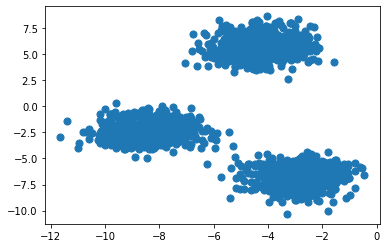

In [28]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [29]:
y

array([2, 2, 1, ..., 1, 0, 2])

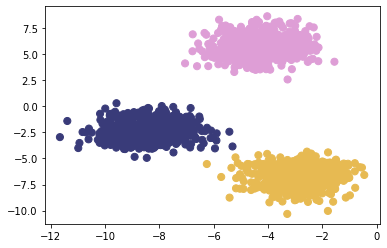

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b')
plt.show()

In [31]:
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [32]:
from scipy.spatial.distance import cdist

In [33]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [34]:
for x in X[105:110]:
    calcs = []
    for c in centroids:
        calcs.append(dist(x, c))
    print(calcs, "Cluster Membership: ", np.argmin(calcs, axis=0))

[4.027750355981394, 10.70202290628413, 5.542160268055164] Cluster Membership:  0
[9.73035280174993, 7.208665829113462, 17.44505393393603] Cluster Membership:  1
[4.066767506545852, 11.113179986633003, 5.1589701124301515] Cluster Membership:  0
[5.284418164665783, 8.931464028407861, 13.314157359115697] Cluster Membership:  0
[6.293105164930943, 13.467921029846712, 2.664298385076878] Cluster Membership:  2


In [35]:
def k_means(X, K):
#Keep track of history so you can see K-means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Euclidean distances are calculated for each point relative to centroids, #and then np.argmin returns
# the index location of the minimal distance - which cluster a point    is #assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
#Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

centers, labels, centers_hist, labels_hist = k_means(X, 3)

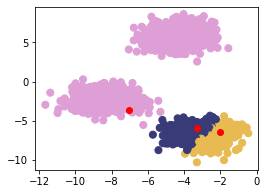

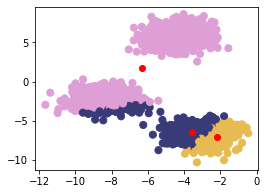

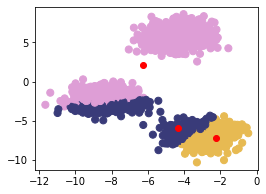

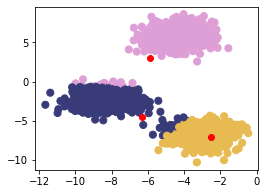

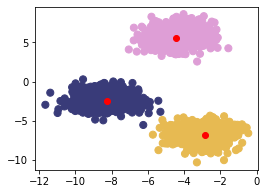

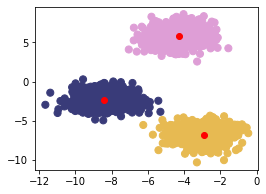

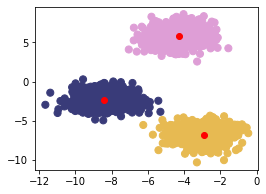

In [36]:
history = zip(centers_hist, labels_hist)

for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()

### Clustering - iris data 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
iris = pd.read_csv('iris_data.csv', header=None)
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'species']

In [38]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [39]:
def k_means(X, K):
#Keep track of history so you can see k-means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Euclidean distances are calculated for each point relative to centroids, #and then np.argmin returns
# the index location of the minimal distance - which cluster a point    is #assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
#Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
# If old centroids and new centroids no longer change, k-means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history


In [40]:
X_mat = X.values

In [41]:
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)

In [45]:
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [53]:
iris['species'][50:100] # 0:50, 51:100

50    Iris-versicolor
51    Iris-versicolor
52    Iris-versicolor
53    Iris-versicolor
54    Iris-versicolor
55    Iris-versicolor
56    Iris-versicolor
57    Iris-versicolor
58    Iris-versicolor
59    Iris-versicolor
60    Iris-versicolor
61    Iris-versicolor
62    Iris-versicolor
63    Iris-versicolor
64    Iris-versicolor
65    Iris-versicolor
66    Iris-versicolor
67    Iris-versicolor
68    Iris-versicolor
69    Iris-versicolor
70    Iris-versicolor
71    Iris-versicolor
72    Iris-versicolor
73    Iris-versicolor
74    Iris-versicolor
75    Iris-versicolor
76    Iris-versicolor
77    Iris-versicolor
78    Iris-versicolor
79    Iris-versicolor
80    Iris-versicolor
81    Iris-versicolor
82    Iris-versicolor
83    Iris-versicolor
84    Iris-versicolor
85    Iris-versicolor
86    Iris-versicolor
87    Iris-versicolor
88    Iris-versicolor
89    Iris-versicolor
90    Iris-versicolor
91    Iris-versicolor
92    Iris-versicolor
93    Iris-versicolor
94    Iris-versicolor
95    Iris

In [47]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int64)